In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/devloper-survey/survey_results_schema.csv
/kaggle/input/devloper-survey/2024 Developer Survey.pdf
/kaggle/input/devloper-survey/survey_results_public.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/devloper-survey/survey_results_public.csv")

In [3]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [5]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,United States of America,Primary/elementary school,NaN,"Employed, full-time",NaN
1,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Employed, full-time",NaN
3,Canada,Some college/university study without earning ...,NaN,"Student, full-time",NaN
4,Norway,"Secondary school (e.g. American high school, G...",NaN,"Student, full-time",NaN


In [6]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
72,Pakistan,"Secondary school (e.g. American high school, G...",1,"Employed, full-time;Student, full-time;Indepen...",7322.0
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,"Employed, full-time",30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",91295.0
385,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17,"Independent contractor, freelancer, or self-em...",53703.0
389,United States of America,Some college/university study without earning ...,7,"Employed, full-time;Student, part-time",110000.0


In [7]:
df

,Country,EdLevel,YearsCodePro,Employment,Salary
72,Pakistan,"Secondary school (e.g. American high school, G...",1,"Employed, full-time;Student, full-time;Indepen...",7322.0
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,"Employed, full-time",30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",91295.0
385,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17,"Independent contractor, freelancer, or self-em...",53703.0
389,United States of America,Some college/university study without earning ...,7,"Employed, full-time;Student, part-time",110000.0
...,...,...,...,...,...
41180,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",3,"Employed, full-time",44640.0
41184,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",30,"Employed, full-time",170000.0
41185,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",15,"Employed, full-time",116844.0
41186,United States of America,Some college/university study without earning ...,1,"Student, full-time;Employed, part-time",12000.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 72 to 41187
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       23435 non-null  object 
 1   EdLevel       23435 non-null  object 
 2   YearsCodePro  23345 non-null  object 
 3   Employment    23435 non-null  object 
 4   Salary        23435 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [9]:
df

,Country,EdLevel,YearsCodePro,Employment,Salary
72,Pakistan,"Secondary school (e.g. American high school, G...",1,"Employed, full-time;Student, full-time;Indepen...",7322.0
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,"Employed, full-time",30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",91295.0
385,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17,"Independent contractor, freelancer, or self-em...",53703.0
389,United States of America,Some college/university study without earning ...,7,"Employed, full-time;Student, part-time",110000.0
...,...,...,...,...,...
41180,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",3,"Employed, full-time",44640.0
41184,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",30,"Employed, full-time",170000.0
41185,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",15,"Employed, full-time",116844.0
41186,United States of America,Some college/university study without earning ...,1,"Student, full-time;Employed, part-time",12000.0


In [10]:
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17586 entries, 374 to 41185
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       17586 non-null  object 
 1   EdLevel       17586 non-null  object 
 2   YearsCodePro  17527 non-null  object 
 3   Salary        17586 non-null  float64
dtypes: float64(1), object(3)
memory usage: 687.0+ KB


In [11]:
df['Country'].value_counts()

Country
United States of America                                3911
Germany                                                 1493
United Kingdom of Great Britain and Northern Ireland    1147
Ukraine                                                 1026
India                                                    842
                                                        ... 
Guyana                                                     1
Sierra Leone                                               1
Namibia                                                    1
Benin                                                      1
Mali                                                       1
Name: count, Length: 155, dtype: int64

In [12]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [13]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()


Country
Other                                                   5642
United States of America                                3911
Germany                                                 1493
United Kingdom of Great Britain and Northern Ireland    1147
Ukraine                                                 1026
India                                                    842
France                                                   720
Canada                                                   685
Brazil                                                   460
Spain                                                    435
Italy                                                    416
Netherlands                                              408
Australia                                                401
Name: count, dtype: int64

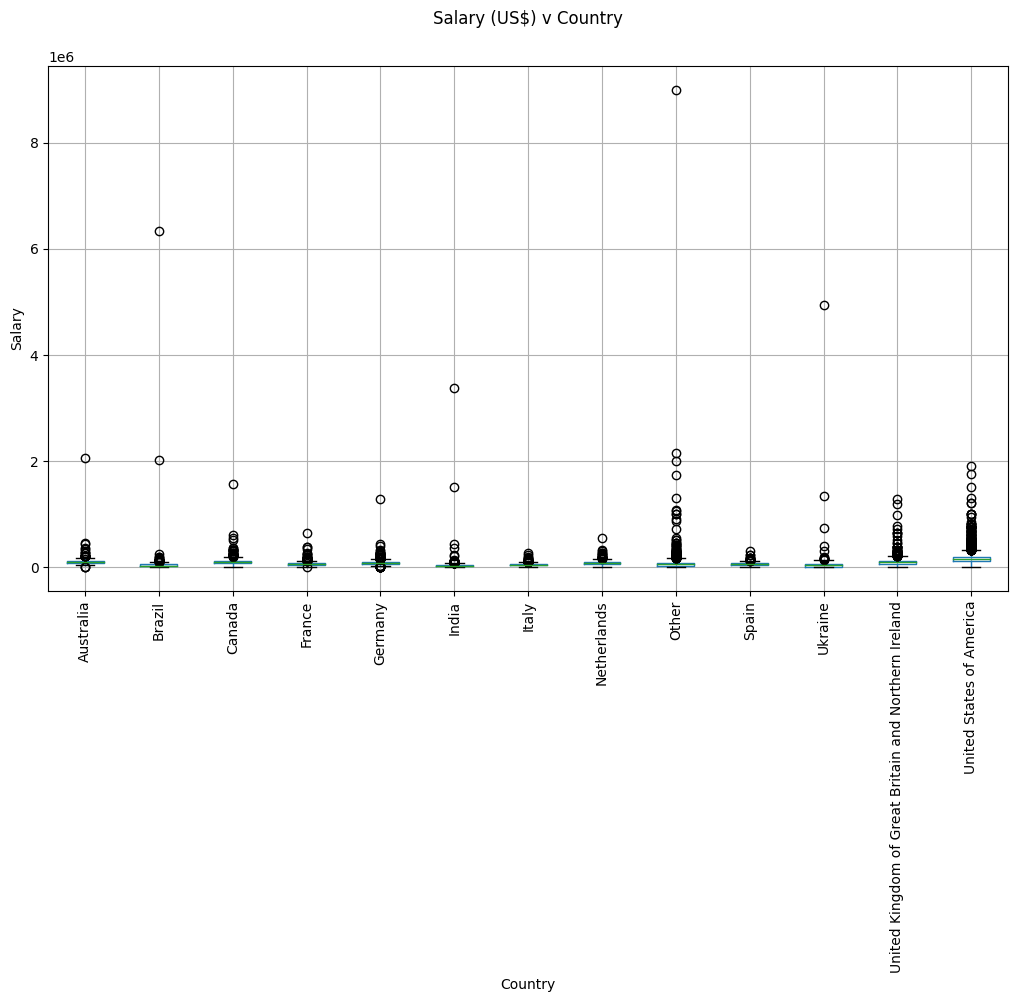

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [15]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

In [16]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [17]:
df["YearsCodePro"].unique()

array([18. , 25. , 30. , 50. , 27. ,  1. , 15. , 11. , 23. , 17. , 10. ,
        8. , 12. , 26. , 40. ,  4. ,  9. , 22. , 28. , 20. , 16. , 13. ,
        3. , 35. ,  5. , 31. , 41. , 36. ,  6. , 14. ,  7. ,  0.5, 24. ,
        2. , 38. , 32. , 21. , 19. , 34. ,  nan, 29. , 43. , 33. , 45. ,
       37. , 44. , 42. , 39. , 46. , 49. , 48. , 47. ])

In [18]:
df["EdLevel"].unique()


array(['Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Primary/elementary school',
       'Something else'], dtype=object)

In [19]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [20]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([3, 2, 1, 0])

In [21]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([10, 11,  3,  4,  1,  2,  6,  5,  9,  8,  7,  0])

In [22]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMRegressor  # or LGBMClassifier for classification tasks
from sklearn.metrics import mean_squared_error  # or use an appropriate metric for classification

# Step 1: Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Step 2: Define the model and the parameter grid
model = LGBMRegressor()  # replace with LGBMClassifier() for classification tasks
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.1, 0.05],
    'n_estimators': [100, 200, 500],
    'max_depth': [-1, 10, 20],
    'min_child_samples': [20, 30, 40]
}

# Step 3: Set up GridSearchCV using only the training set
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error'  # use appropriate scoring metric
)

# Step 4: Fit grid search on the training data
grid_search.fit(X_train, y_train)

# Step 5: Check the best parameters found and evaluate on the validation set
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate on the validation set
val_predictions = best_model.predict(X_val)
val_rmse = mean_squared_error(y_val, val_predictions, squared=False)  # RMSE
print("Validation RMSE: ", val_rmse)

# Step 6: Optionally, evaluate on the test set after tuning
test_predictions = best_model.predict(X_test)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)  # RMSE
print("Test RMSE: ", test_rmse)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 6017, number of used features: 3
[LightGBM] [Info] Start training from score 93098.934020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 6016, number of used features: 3
[LightGBM] [Info] Start training from score 93675.260971
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 6017, number of used features: 3
[LightGBM] [Info] Start trainin

In [24]:
import pickle

# Step 1: Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

data = {"model": best_model , "le_country": le_country, "le_education": le_education}
with open('Lgbm_model.pkl', 'wb') as file:
    pickle.dump(data, file)


In [26]:
with open('Lgbm_model.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

y_pred = regressor_loaded.predict(X)
y_pred



[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


array([101548.44845826, 107274.33402158, 156589.12956899, ...,
       159093.02981197, 160772.07169196, 152235.00669162])